# Question 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Titanic dataset into a pandas DataFrame
titanic_df = pd.read_csv("titanic.csv")

In [3]:
# Explore the first few rows of the dataset to understand its structure
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,8.0500,S


In [4]:
# Calculate and visualise the basic statistics (mean, median, etc) for the numeric columns
numeric_stats = titanic_df.describe()
numeric_stats

,PassengerId,Survived,Pclass,Age,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,6.000000,512.329200


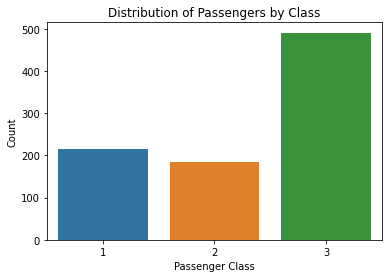

In [9]:
# Create a bar chart to show the distribution of passengers by class 
sns.countplot(data=titanic_df, x=titanic_df['Pclass'])
plt.title('Distribution of Passengers by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show() 

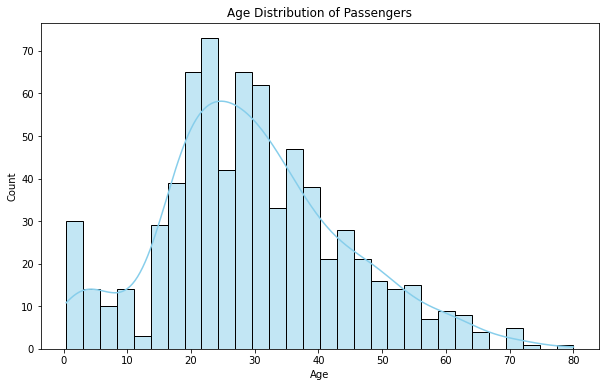

In [10]:
# Create a histogram to visualise the age distribution of passengers
plt.figure(figsize=(10, 6))
sns.histplot(titanic_df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

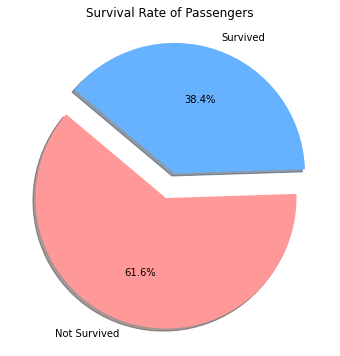

In [16]:
# Calculate and visualise the survival rate of passengers. Create a pie chart to represent this information
survival_counts = titanic_df['Survived'].value_counts()

# Plotting
labels = ['Not Survived', 'Survived']
colors = ['#ff9999','#66b2ff']
plt.figure(figsize=(8, 6))
plt.pie(survival_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True, explode=(0.1, 0.1))
plt.title('Survival Rate of Passengers')
plt.show()

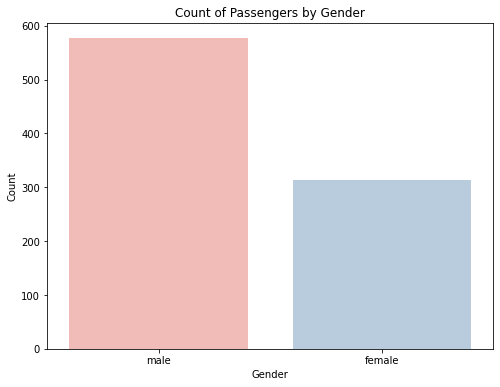

In [12]:
# Create a bar chart to show the count of passengers by gender
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_df, x='Sex', palette="Pastel1")
plt.title('Count of Passengers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

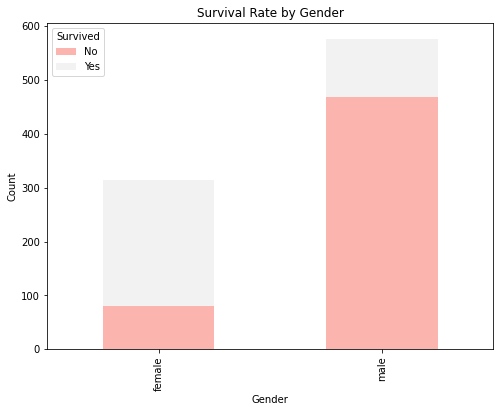

In [13]:
# Create a stacked bar chart to visualise the survival rate by gender. Explain any gender-based differences in survival
gender_survival = titanic_df.groupby(['Sex', 'Survived']).size().unstack()

# Plotting
gender_survival.plot(kind='bar', stacked=True, figsize=(8, 6), colormap="Pastel1")
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

The stacked bar chart visualizes the survival rate by gender:
* A significant proportion of female passengers survived compared to their male counterparts.
* For male passengers, a large majority did not survive.

Historically, it's known that there was a "women and children first" policy for lifeboat boarding, which could explain the higher survival rate for females. This observation aligns with this policy, as female passengers had a much higher chance of survival compared to male passengers.

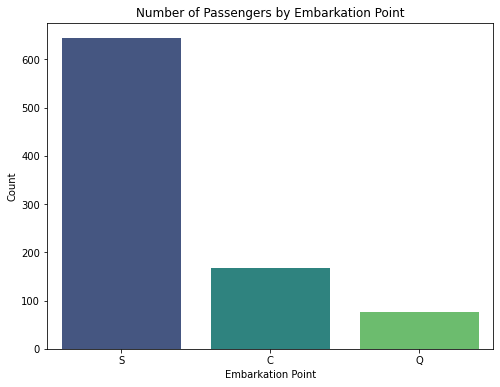

In [14]:
# Create a count plot (bar chart) to show the number of passengers who embarked from each location (S, C, Q)
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_df, x='Embarked', palette="viridis")
plt.title('Number of Passengers by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Count')
plt.show()

The bar chart showcases the number of passengers by their embarkation point:
* S (Southampton): The majority of passengers embarked from Southampton.
* C (Cherbourg): A significant number of passengers embarked from Cherbourg, but less than Southampton.
* Q (Queenstown): The fewest passengers embarked from Queenstown compared to the other two points.

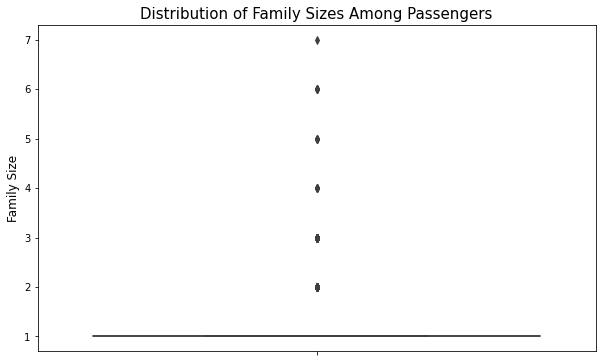

In [15]:
#  Create a box plot to visualise the distribution of family sizes among passengers
# Calculate family size by adding the 'Parch' (parents/children) column to itself (since each row represents one passenger)
titanic_df['FamilySize'] = titanic_df['Parch'] + 1

# Create a box plot for the distribution of family sizes
plt.figure(figsize=(10, 6))
sns.boxplot(y=titanic_df['FamilySize'], color='lightseagreen')
plt.title('Distribution of Family Sizes Among Passengers', fontsize=15)
plt.ylabel('Family Size', fontsize=12)
plt.show()

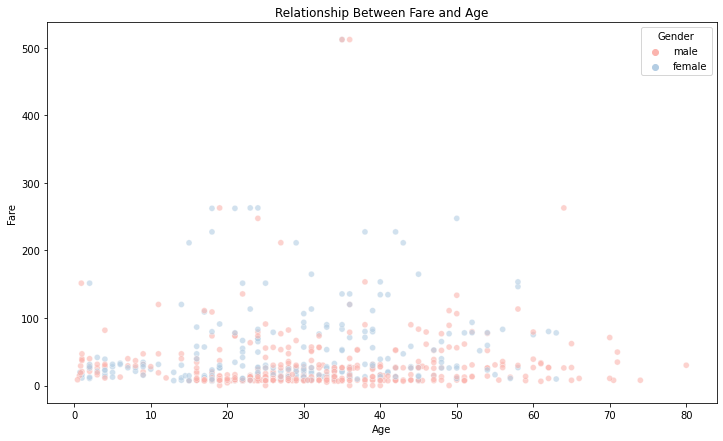

In [17]:
# Create a scatter plot to visualise the relationship between fare and age
# Scatter plot for the relationship between fare and age
plt.figure(figsize=(12, 7))
sns.scatterplot(x=titanic_df['Age'], y=titanic_df['Fare'], hue=titanic_df['Sex'], palette='Pastel1', alpha=0.6)
plt.title('Relationship Between Fare and Age')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Gender')
plt.show()

* There isn't a strong linear relationship between age and fare. This means that fare doesn't necessarily increase or decrease with age.
* Most passengers, regardless of age, paid lower fares, as indicated by the dense concentration of points near the bottom of the plot.
* There are some passengers (across various age groups) who paid significantly higher fares, as indicated by the points higher up on the y-axis.
* The hue differentiation based on gender shows that both males and females are spread across the age and fare spectrum.